In [72]:
import numpy as np
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Reading Data

In [73]:
def segmentWords(s): 
    return s.split()

def readFile(fileName):
    # Function for reading file
    # input: filename as string
    # output: contents of file as list containing single words
    contents = []
    f = open(fileName)
    for line in f:
        contents.append(line)
    f.close()
    result = segmentWords('\n'.join(contents))
    return result

#### Create a Dataframe containing the counts of each word in a file

In [74]:
d = []

for c in os.listdir("data_training"):
    directory = "data_training/" + c
    for file in os.listdir(directory):
        words = readFile(directory + "/" + file)
        e = {x:words.count(x) for x in words}
        e['__FileID__'] = file
        e['__CLASS__'] = c
        d.append(e)

Create a dataframe from d - make sure to fill all the nan values with zeros.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html


In [75]:
dataframe = pd.DataFrame(data=d)
dataframe = dataframe.fillna(value=0)

In [76]:
dataframe['__CLASS__'].head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: __CLASS__, dtype: object

#### Split data into training and validation set 

* Sample 80% of your dataframe to be the training data

* Let the remaining 20% be the validation data (you can filter out the indicies of the original dataframe that weren't selected for the training data)

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [77]:
training = dataframe.sample(frac=0.8, random_state=5)
training = training.drop('__FileID__', 1)
indices = training.index
remaining = dataframe.drop(indices)
remaining = remaining.drop('__FileID__', 1)

* Split the dataframe for both training and validation data into x and y dataframes - where y contains the labels and x contains the words

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [78]:
y_training = training['__CLASS__']
x_training = training.drop('__CLASS__', 1)
y_validation = remaining['__CLASS__']
x_validation = remaining.drop('__CLASS__', 1)

x_training.head()

,,earth,goodies,if,ripley,suspend,they,white,,,...,zukovsky,zundel,zurg's,zweibel,zwick,zwick's,zwigoff's,zycie,zycie',|
1510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

#### Basic Logistic Regression
* Use sklearn's linear_model.LogisticRegression() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [79]:
from sklearn import linear_model
log_regression_model = sklearn.linear_model.LogisticRegression()
log_regression_model.fit(x_training, y_training)
log_regression_model.score(x_validation, y_validation)


0.8125

#### Changing Parameters

In [80]:
logreg = sklearn.linear_model.LogisticRegression(tol=1e-11)
logreg.fit(x_training, y_training)
logreg.score(x_validation, y_validation)

0.81562500000000004

In [81]:
logreg = sklearn.linear_model.LogisticRegression(C = 1e2)
logreg.fit(x_training, y_training)
logreg.score(x_validation, y_validation)

0.82187500000000002

In [82]:
means = []
for row in x_training:
    means.append(x_training[row].mean())

In [83]:
means = np.asarray(means)
means

array([ 0.00078125,  0.00078125,  0.00078125, ...,  0.        ,
        0.        ,  0.        ])

In [84]:
means.size

45671

In [85]:
m = means.mean()

In [86]:
std = means.std()

In [87]:
m

0.016405976303343478

In [88]:
std

0.37061859010896875

In [16]:
#has to be +1 sd or more
x_validation= x_validation.drop([row for row in x_training if x_training[row].mean() - m < std], axis=1)
x_training = x_training.drop([row for row in x_training if x_training[row].mean() - m < std], axis=1)

In [17]:
x_training.head()

,!,"""",(,),*,",",-,--,.,:,...,who,why,will,with,work,world,would,years,you,your
1510,0,0,7,7,0,29,2,0,28,0,...,2,0,2,5,1,1,0,0,1,0
209,0,4,2,2,0,33,0,0,26,1,...,2,1,1,7,0,0,2,0,4,0
425,0,0,7,7,4,47,0,5,36,5,...,1,2,0,5,0,0,1,0,0,0
982,0,0,1,1,0,41,0,0,32,1,...,4,0,1,5,0,1,4,0,1,0
619,1,6,10,12,2,86,0,2,52,1,...,3,1,0,9,1,0,2,1,1,1


In [18]:
logreg = sklearn.linear_model.LogisticRegression(tol=1e-11)
logreg.fit(x_training, y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=1e-11,
          verbose=0)

In [19]:
x_training.shape

(1280, 202)

In [20]:
y_training.shape

(1280,)

In [21]:
x_validation.shape

(320, 202)

In [22]:
y_validation.shape

(320,)

In [23]:
logreg.score(x_training, y_training)

0.85546875

#### Feature Selection
* In the backward stepsize selection method, you can remove coefficients and the corresponding x columns, where the coefficient is more than a particular amount away from the mean - you can choose how far from the mean is reasonable.

References:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html

How did you select which features to remove? Why did that reduce overfitting?

# Single Decision Tree

#### Basic Decision Tree

* Initialize your model as a decision tree with sklearn.
* Fit the data and labels to the model.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [25]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = sklearn.tree.DecisionTreeClassifier()
decision_tree_model.fit(x_training, y_training)
decision_tree_model.score(x_validation, y_validation)


0.60624999999999996

#### Changing Parameters
* To test out which value is optimal for a particular parameter, you can either loop through various values or look into sklearn.model_selection.GridSearchCV

References:


http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(x_training, y_training)
importances = classifier.feature_importances_
std = np.std(classifier.feature_importances_,
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_training.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        

Feature ranking:
1. feature 22 (0.078566)
2. feature 31 (0.077213)
3. feature 5 (0.025619)
4. feature 150 (0.022612)
5. feature 99 (0.021964)
6. feature 76 (0.019963)
7. feature 43 (0.019391)
8. feature 113 (0.017427)
9. feature 28 (0.016429)
10. feature 119 (0.016126)
11. feature 171 (0.015759)
12. feature 121 (0.015287)
13. feature 11 (0.014918)
14. feature 91 (0.014752)
15. feature 174 (0.014749)
16. feature 108 (0.013872)
17. feature 145 (0.013755)
18. feature 166 (0.012495)
19. feature 44 (0.012495)
20. feature 186 (0.012423)
21. feature 93 (0.012326)
22. feature 60 (0.012246)
23. feature 161 (0.011365)
24. feature 181 (0.011150)
25. feature 68 (0.011092)
26. feature 134 (0.011060)
27. feature 50 (0.010587)
28. feature 156 (0.010462)
29. feature 173 (0.010288)
30. feature 46 (0.009956)
31. feature 200 (0.009922)
32. feature 148 (0.009886)
33. feature 19 (0.009429)
34. feature 12 (0.009197)
35. feature 9 (0.009115)
36. feature 79 (0.008802)
37. feature 1 (0.008793)
38. feature 185 

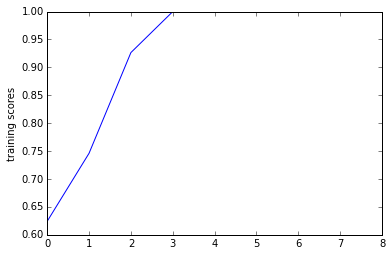

In [27]:
plt_training_scores = [];
plt_val_scores = [];

for i in [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]:
    new_tree_model = sklearn.tree.DecisionTreeClassifier(max_depth=i)
    new_tree_model.fit(x_training, y_training)
    plt_training_scores.append(new_tree_model.score(x_training, y_training))
    plt_val_scores.append(new_tree_model.score(x_validation,y_validation))

plt.plot(plt_training_scores)
plt.ylabel('training scores')
plt.show()

How did you choose which parameters to change and what value to give to them? Feel free to show a plot.

(The parameters are changed at the end of this section). I changed max_depth to 5, and max_features to 10,000. This increased the score from 0.628 to 0.656.

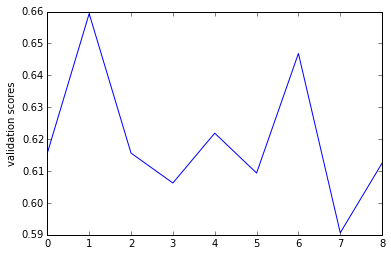

In [28]:
plt.plot(plt_val_scores)
plt.ylabel('validation scores')
plt.show()

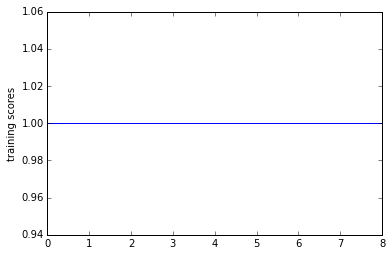

In [45]:
plt_training_scores = [];
plt_val_scores = [];

for i in [1, 10, 50, 100, 500, 1000, 5000, 10000, 40000]:
    new_tree_model = sklearn.tree.DecisionTreeClassifier(max_features=i)
    new_tree_model.fit(x_training, y_training)
    plt_training_scores.append(new_tree_model.score(x_training, y_training))
    plt_val_scores.append(new_tree_model.score(x_validation,y_validation))

plt.plot(plt_training_scores)
plt.ylabel('training scores')
plt.show()

Why is a single decision tree so prone to overfitting?

Decisions Trees are prone to overfitting because unless you stop them before completion, they will always perfectly categorize all the elements in the test set, meaning that they do not generalize well and overfit.

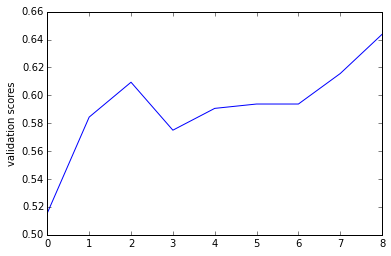

In [46]:
plt.plot(plt_val_scores)
plt.ylabel('validation scores')
plt.show()

In [47]:
improved_tree_model = sklearn.tree.DecisionTreeClassifier(max_depth=5, max_features=100)
improved_tree_model.fit(x_training, y_training)
improved_tree_model.score(x_validation, y_validation)

0.59062499999999996

# Random Forest Classifier

#### Basic Random Forest

* Use sklearn's ensemble.RandomForestClassifier() to create your model.
* Fit the data and labels with your model.
* Score your model with the same data and labels.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_training, y_training)
random_forest.score(x_validation, y_validation)

0.71875

#### Changing Parameters

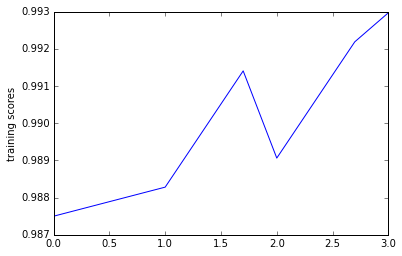

In [63]:
plt_training_scores = [];
plt_val_scores = [];
features = [1, 10, 50, 100, 500, 1000]
for i in features:
    new_tree_model = RandomForestClassifier(max_features=i)
    new_tree_model.fit(x_training, y_training)
    plt_training_scores.append(new_tree_model.score(x_training, y_training))
    plt_val_scores.append(new_tree_model.score(x_validation,y_validation))

plt.plot([math.log10(x) for x in features], plt_training_scores)
plt.ylabel('training scores')
plt.show()

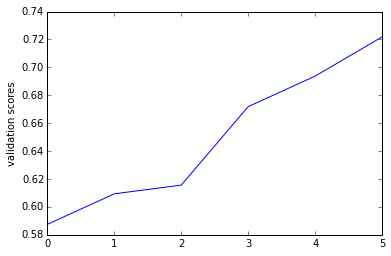

In [50]:
plt.plot(plt_val_scores)
plt.ylabel('validation scores')
plt.show()

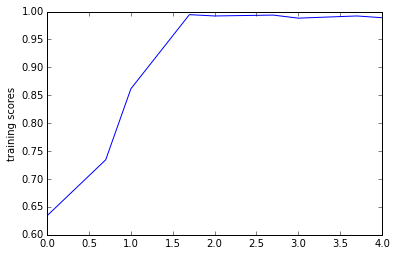

In [61]:
plt_training_scores = [];
plt_val_scores = [];
depth = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for i in depth:
    new_tree_model = RandomForestClassifier(max_depth=i)
    new_tree_model.fit(x_training, y_training)
    plt_training_scores.append(new_tree_model.score(x_training, y_training))
    plt_val_scores.append(new_tree_model.score(x_validation,y_validation))

plt.plot([math.log10(x) for x in depth], plt_training_scores)
plt.ylabel('training scores')
plt.show()

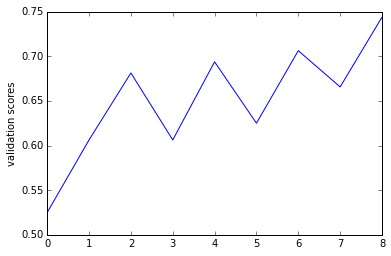

In [52]:
plt.plot(plt_val_scores)
plt.ylabel('validation scores')
plt.show()

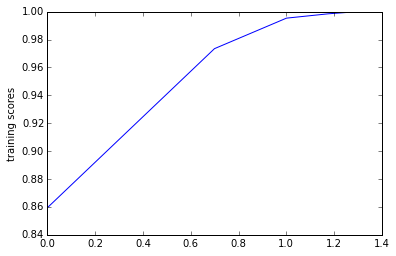

In [67]:
plt_training_scores = [];
plt_val_scores = [];
estimators = [1, 5, 10, 15, 20]
for i in estimators:
    new_tree_model = RandomForestClassifier(n_estimators=i)
    new_tree_model.fit(x_training, y_training)
    plt_training_scores.append(new_tree_model.score(x_training, y_training))
    plt_val_scores.append(new_tree_model.score(x_validation,y_validation))

plt.plot([math.log10(x) for x in estimators], plt_training_scores)
plt.ylabel('training scores')
plt.show()

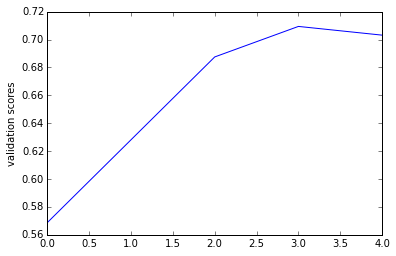

In [68]:
plt.plot(plt_val_scores)
plt.ylabel('validation scores')
plt.show()

What parameters did you choose to change and why?

In [70]:
new_tree_model = RandomForestClassifier(n_estimators=15, max_depth = 500, max_features=50)
new_tree_model.fit(x_training, y_training)
new_tree_model.score(x_training, y_training)

0.99765625000000002

How does a random forest classifier prevent overfitting better than a single decision tree?